In [80]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import Waveform_Analysis.PMT_POSITIONS as pmtpos
import Waveform_Analysis.data_processing.settings as settings
import Waveform_Analysis.CABLE_DELAYS as cableDelays
import math

fileToView = "/mnt/data/eos/laserball46.root"
df = ROOT.RDataFrame("events", fileToView)
fitted_time = df.AsNumpy(columns=["fitted_time"])["fitted_time"]
channel = df.AsNumpy(columns=["channel"])["channel"]
board = df.AsNumpy(columns=["board"])["board"]
lcn = df.AsNumpy(columns=["lcn"])["lcn"]

eventPositionX = 0.0
eventPositionY = 0.0
eventPositionZ = 0.0

print("Finished loading")

Finished loading


# Calculating the Cable delays

### Display the Time Residual for a single PMT

58
Hist Mean 105.5675513437288
Fit Mean 120.77976171019071
 FCN=724.127 FROM MIGRAD    STATUS=CONVERGED     163 CALLS         164 TOTAL
                     EDM=9.08969e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.80935e+00   9.23237e-01   7.57200e-03   4.81230e-04
   2  Mean         1.20780e+02   4.29518e+00   4.83770e-02  -1.03689e-04
   3  Sigma        3.26156e+01   8.58182e+00   1.28413e-03   3.31141e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


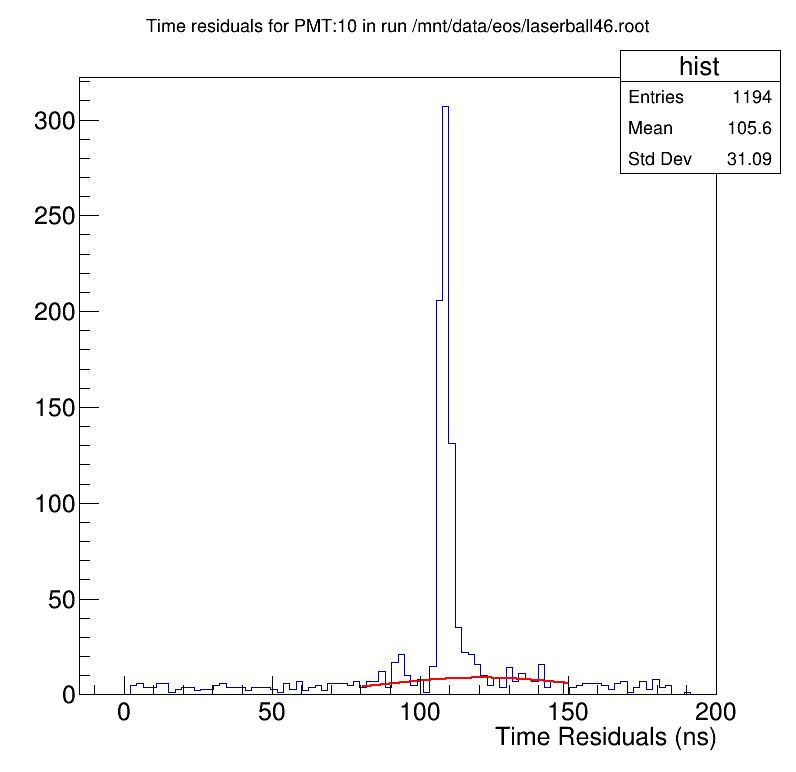

In [77]:
# (LCN = iCh + 16*iBoard)

timeResiduals = []
PMT = 10
PMTCanvas = ROOT.TCanvas("c1", "c1", 800,800)
PMThist = ROOT.TH1D("hist","Time residuals for PMT:" + str(PMT) + " in run " + fileToView, 100,-15,200);

for event in range(len(fitted_time)):
    for time, channels, boards in zip(fitted_time[event], channel[event], board[event]):
        pmt = channels +16*boards
        if pmtpos.x[pmt] == -1:
            continue

        if pmt != PMT:
            continue

        distance = math.sqrt((pmtpos.x[pmt]-eventPositionX)**2+(pmtpos.y[pmt]-eventPositionY)**2+(pmtpos.z[pmt]-eventPositionZ)**2)
        if (fitted_time[event][pmt]-distance/settings.v_water) < 0 or (fitted_time[event][pmt]-distance/settings.v_water) > 100000:
            #print(pmt, fitted_time[event][pmt], distance)
            continue
        #timeResiduals.append(fitted_time[event][pmt]-distance/settings.v_water)
        PMThist.Fill((fitted_time[event][pmt]-distance/settings.v_water))

peak = PMThist.GetMaximumBin()
print(peak)
gausfit2 = ROOT.TF1("fit2", "gaus",80,150)
PMThist.Draw()
PMThist.GetXaxis().SetTitle("Time Residuals (ns)")
PMThist.Fit("fit2", "R")
print("Hist Mean " + str(PMThist.GetMean()))
print("Fit Mean " + str(gausfit2.GetParameter(1)))
PMTCanvas.Draw()

### Calculate the Cable Delays using a Gaus Fit

In [81]:
timeResiduals = []
#PMT = 1
#PMTCanvas = ROOT.TCanvas("c1", "c1", 800,800)
CableDelayhist = ROOT.TH1D("hist","Time residuals for PMT:" + str(PMT) + " in run " + fileToView, 100,-15,150);
cable_Delays = [None]*300

for lcn in range(len(pmtpos.x)):
    for event in range(len(fitted_time)):
        for time, channels, boards in zip(fitted_time[event], channel[event], board[event]):
            pmt = channels +16*boards
            if pmtpos.x[pmt] == -1:
                continue
    
            if pmt != lcn:
                continue

            if (fitted_time[event][pmt]-distance/settings.v_water) < 0:
                #print(pmt, fitted_time[event][pmt], distance)
                continue

            distance = math.sqrt((pmtpos.x[pmt]-eventPositionX)**2+(pmtpos.y[pmt]-eventPositionY)**2+(pmtpos.z[pmt]-eventPositionZ)**2)
            #timeResiduals.append(fitted_time[event][pmt]-distance/settings.v_water)
            CableDelayhist.Fill((fitted_time[event][pmt]-distance/settings.v_water))

    gausfit3 = ROOT.TF1("fit2", "gaus",80,150)
    #PMThist.Draw()
    #PMThist.GetXaxis().SetTitle("Time Residuals (ns)")
    CableDelayhist.Fit("fit2", "R")
    #print("Hist Mean " + str(CableDelayhist.GetMean()))
    #print("Fit Mean " + str(gausfit3.GetParameter(1)))

    #print(lcn)
    cable_Delays[lcn] = gausfit3.GetParameter(1)

print(cable_Delays)

[118.4167198874788, 109.63386429820304, 109.31634238296266, 109.1765616465429, 109.1169134606575, 109.08987702639938, 109.07160966702686, 109.07163248981884, 109.07163248981884, 109.06885436627715, 108.9715680734965, 108.8446470493608, 108.78758579475273, 108.7362199150948, 108.72542609299023, 108.72542609299023, 108.72364098660735, 108.72143662721062, 108.72109004685171, 108.72400155325919, 108.7157782711338, 108.60558934272183, 108.56869931726148, 108.55446313618005, 108.54749835109061, 108.54478654670469, 108.54339512844412, 108.54345515391118, 108.54345515391118, 108.54186311888199, 108.51030512765645, 108.51030512765645, 108.49383636530777, 108.4876193119333, 108.4775799138774, 108.47395603397202, 108.4722641597014, 108.47218837214746, 108.47114537663764, 108.47116689053293, 108.42678692655986, 108.379344979856, 108.35397569498845, 108.35397569498845, 108.34633280931028, 108.3431380141062, 108.34206617833684, 108.34206617833684, 108.34228479806191, 108.34226302180595, 108.32828129

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


# Calculate the time residuals for this run

 FCN=350.081 FROM MIGRAD    STATUS=CONVERGED      99 CALLS         100 TOTAL
                     EDM=5.00543e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.74207e+00   2.75371e-01   2.02960e-03  -1.08382e-03
   2  Mean         1.01714e+01   4.08896e-01   2.25750e-03   1.21669e-03
   3  Sigma        5.88902e+00   3.90624e-01   1.37390e-04   1.47094e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


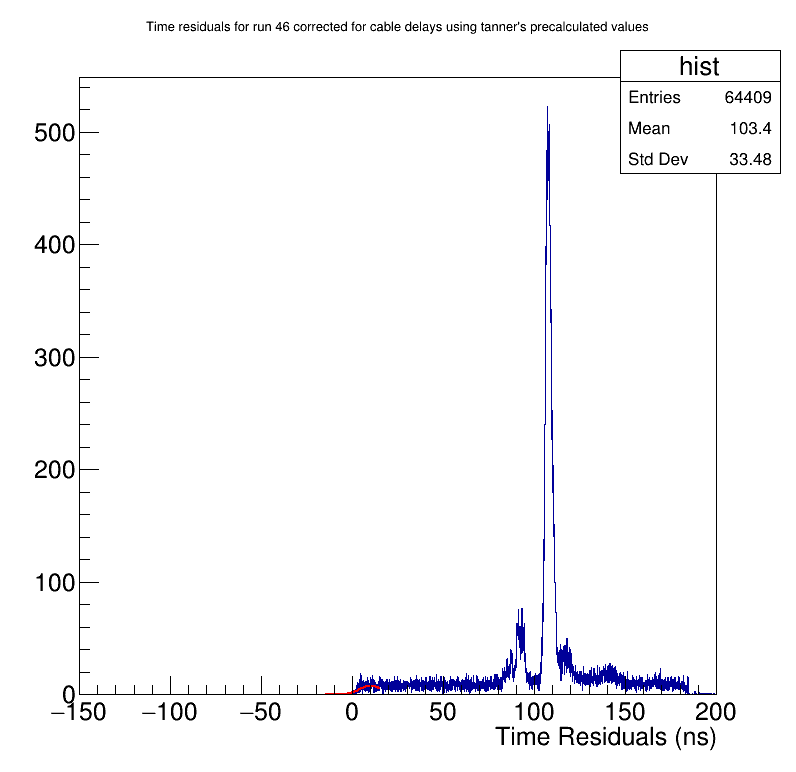

In [84]:
# (LCN = iCh + 16*iBoard)

timeResiduals = []
c1 = ROOT.TCanvas("c1", "c1", 800,800)
hist = ROOT.TH1D("hist","Time residuals for run 46 corrected for cable delays using tanner's precalculated values", 5000,-150,200);

for event in range(len(fitted_time)):
    #i = 0
    for time, channels, boards in zip(fitted_time[event], channel[event], board[event]):
        pmt = channels +16*boards
        #print(lcn[event][0])
        #pmt = lcn[event][i]
        #i = i + 1
        if pmtpos.x[pmt] == -1:
            pass
            
        if ((boards == 12 and channels < 12) or boards == 13):
            pass # These are the 12'' PMTs
        elif boards == 7:
            pass # These are the 8'' PMTs directly behind the dichroicons
        elif boards == 16:
            pass # These are the 10'' PMTs behind the dichroicons
        # These are the rest of the 8'' PMTs
        else:
            distance = math.sqrt(((pmtpos.x[pmt]-eventPositionX)**2)+((pmtpos.y[pmt]-eventPositionY)**2)+((pmtpos.z[pmt]-eventPositionZ)**2))
            #timeResiduals.append(fitted_time[event][pmt]-distance/settings.v_water)
            
            if ((fitted_time[event][pmt]-distance/settings.v_water)) < 0:
                continue
                #print(pmt, fitted_time[event][pmt], distance)
            hist.Fill((fitted_time[event][pmt]-distance/settings.v_water))
            #hist.Fill((fitted_time[event][pmt]-distance/settings.v_water) - cable_Delays[pmt])
            #timeResiduals.append((fitted_time[event][pmt]-distance/settings.v_water))

gausfit = ROOT.TF1("fit", "gaus",-15,15)
hist.Draw()
hist.GetXaxis().SetTitle("Time Residuals (ns)")
hist.Fit("fit", "R")
c1.Draw()
# print(timeResiduals[0:100])

# plt.hist(timeResiduals[1:8000], bins=10000)
# axs = plt.gca()
# # plt.yscale("log")
# axs.set_xlim([-15,15])
# plt.show()